<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad5_unidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Tamaño de los datos de entrenamiento: (60000, 28, 28)
Tamaño de los datos de prueba: (10000, 28, 28)
Cantidad de etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]


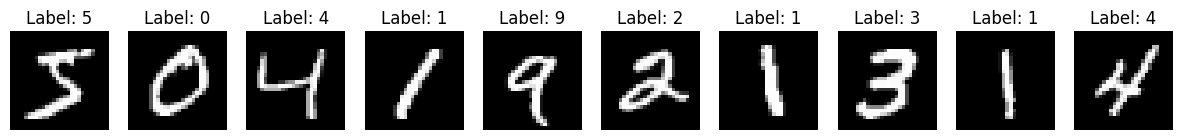

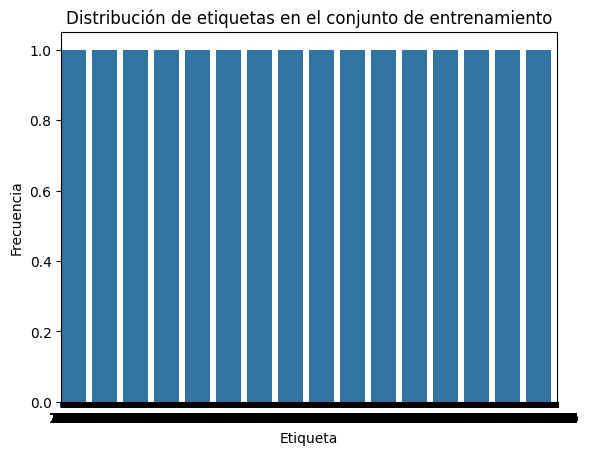

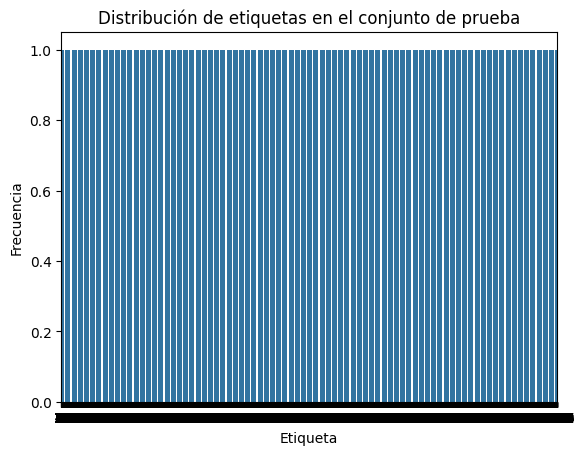

Label: 0
images: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

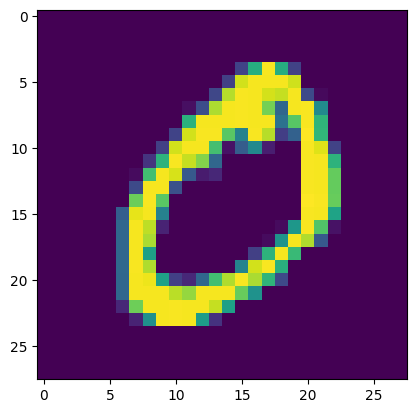

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

#cargar el conjunto de datos
mnist=keras.datasets.mnist

#division de los datos de entrenamiento y prueba
(traint_images,traint_labels),(test_images,test_labels)=mnist.load_data()

print(f'Tamaño de los datos de entrenamiento: {traint_images.shape}')
print(f'Tamaño de los datos de prueba: {test_images.shape}')
print(f'Cantidad de etiquetas únicas: {np.unique(traint_labels)}')

# Visualizar las primeras 10 imágenes de entrenamiento
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(traint_images[i], cmap='gray')
    axes[i].set_title(f'Label: {traint_labels[i]}')
    axes[i].axis('off')
plt.show()

# Distribución de etiquetas de entrenamiento
sns.countplot(traint_labels)
plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de etiquetas de prueba
sns.countplot(test_labels)
plt.title('Distribución de etiquetas en el conjunto de prueba')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.show()

#poner aqui entre 0 y 5999
index=1
#imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print(f'Label: {traint_labels[index]}')
print(f'images: {traint_images[index]}')

#visualiza la imagen
plt.imshow(traint_images[index])

In [ ]:
#normalizacion de los datos
traint_images=traint_images/255.0
test_images=test_images/255.0

#construccion del modelo de clasificacion
model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                               keras.layers.Dense(128, activation='relu'),
                               keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#entrenamiento del modelo

history=model.fit(traint_images,traint_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2613 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1149 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0795 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

<Axes: >

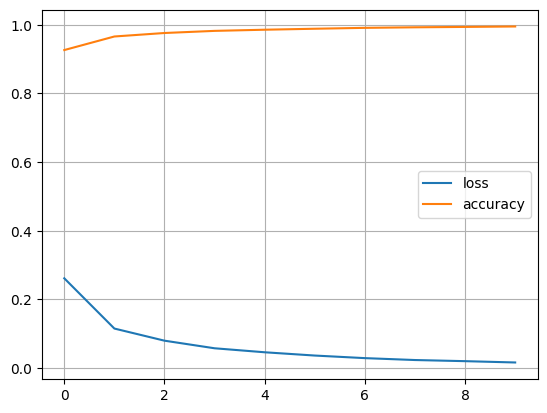

In [ ]:
#Graficar el historial del entrenamiento
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
#Evaluar el modelo en el conjunto de entrenamiento
loss,accuracy=model.evaluate(traint_images,traint_labels)

print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

#Evaluar el modelo en el conjunto de entrenamiento
loss,accuracy=model.evaluate(test_images,test_labels)

print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0111 - accuracy: 0.9967
loss: 0.011087163351476192
accuracy: 0.9966999888420105
313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9796
loss: 0.07912736386060715
accuracy: 0.9796000123023987


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 971    2    0    1    0    1    2    1    2    0]
 [   0 1125    3    2    0    1    2    1    1    0]
 [   2    2 1012    1    1    0    4    5    4    1]
 [   0    0    3  998    0    1    0    1    3    4]
 [   0    0    2    1  962    1    7    2    0    7]
 [   2    0    0   13    1  868    4    1    2    1]
 [   1    3    1    1    4    4  943    0    1    0]
 [   2    2    7    2    1    0    0 1008    1    5]
 [   4    1    3   14    4    6    2    6  930    4]
 [   2    4    0    4    9    6    0    4    1  979]]


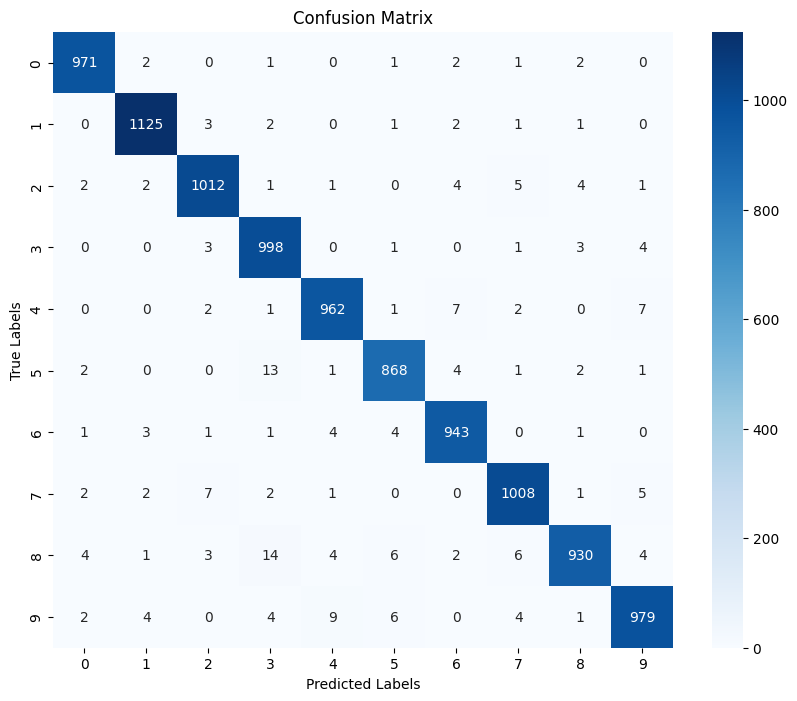

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

F1 Score: 0.9795837836597026


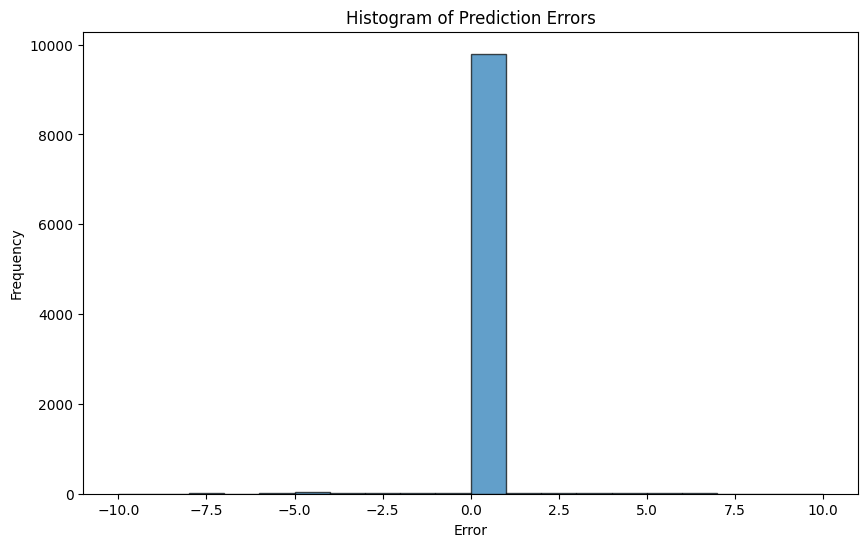

In [ ]:
# Predecir etiquetas en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Reporte de clasificación
class_report = classification_report(test_labels, predicted_labels)
print('Classification Report:')
print(class_report)

# Calcular F1 Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1}')

# Graficar histograma de la distribución del error
errors = np.argmax(predictions, axis=1) - test_labels
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=range(-10, 11), edgecolor='black', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()